<a href="https://colab.research.google.com/github/DiploDatos/AnalisisYCuracion/blob/master/Entregable_Parte_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Exploración y Curación de Datos**

*Edición 2021*

----

# Trabajo práctico entregable - parte 1

En esta notebook, vamos a cargar el conjunto de datos de [la compentencia Kaggle](https://www.kaggle.com/dansbecker/melbourne-housing-snapshot) sobre estimación de precios de ventas de propiedades en Melbourne, Australia.

Utilizaremos el conjunto de datos reducido producido por [DanB](https://www.kaggle.com/dansbecker). Hemos subido una copia a un servidor de la Universidad Nacional de Córdoba para facilitar su acceso remoto.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import missingno as msn
from scipy import stats

import seaborn as sns
sns.set_context('talk')
pd.set_option('display.float_format', lambda x: '%.2f' % x)

import plotly
plotly.__version__

'4.4.1'

In [159]:
melb_df = pd.read_csv(
    'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/melb_data.csv')
melb_df

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.00,S,Biggin,3/12/2016,2.50,3067.00,2.00,1.00,1.00,202.00,nan,nan,Yarra,-37.80,145.00,Northern Metropolitan,4019.00
1,Abbotsford,25 Bloomburg St,2,h,1035000.00,S,Biggin,4/02/2016,2.50,3067.00,2.00,1.00,0.00,156.00,79.00,1900.00,Yarra,-37.81,144.99,Northern Metropolitan,4019.00
2,Abbotsford,5 Charles St,3,h,1465000.00,SP,Biggin,4/03/2017,2.50,3067.00,3.00,2.00,0.00,134.00,150.00,1900.00,Yarra,-37.81,144.99,Northern Metropolitan,4019.00
3,Abbotsford,40 Federation La,3,h,850000.00,PI,Biggin,4/03/2017,2.50,3067.00,3.00,2.00,1.00,94.00,nan,nan,Yarra,-37.80,145.00,Northern Metropolitan,4019.00
4,Abbotsford,55a Park St,4,h,1600000.00,VB,Nelson,4/06/2016,2.50,3067.00,3.00,1.00,2.00,120.00,142.00,2014.00,Yarra,-37.81,144.99,Northern Metropolitan,4019.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,12 Strada Cr,4,h,1245000.00,S,Barry,26/08/2017,16.70,3150.00,4.00,2.00,2.00,652.00,nan,1981.00,NaN,-37.91,145.17,South-Eastern Metropolitan,7392.00
13576,Williamstown,77 Merrett Dr,3,h,1031000.00,SP,Williams,26/08/2017,6.80,3016.00,3.00,2.00,2.00,333.00,133.00,1995.00,NaN,-37.86,144.88,Western Metropolitan,6380.00
13577,Williamstown,83 Power St,3,h,1170000.00,S,Raine,26/08/2017,6.80,3016.00,3.00,2.00,4.00,436.00,nan,1997.00,NaN,-37.85,144.89,Western Metropolitan,6380.00
13578,Williamstown,96 Verdon St,4,h,2500000.00,PI,Sweeney,26/08/2017,6.80,3016.00,4.00,1.00,5.00,866.00,157.00,1920.00,NaN,-37.86,144.89,Western Metropolitan,6380.00


In [160]:
melb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

## Ejercicio 1: 

1. Eliminar los valores extremos que no sean relevantes para la predicción de valores de las propiedades.

1. Investigar la distribución de las variables del conjunto de datos y seleccionar un subconjunto de columnas que les parezcan relevantes al problema de predicción del valor de la propiedad.
  1. Justificar cada columna no seleccionada.
  2. Para las variables categóricas seleccionadas, agrupe o combine las categorías poco frecuentes para asegurar que todos los grupos tengan un número mínimo de registros.

2. Agregar información adicional respectiva al entorno de una propiedad a partir del [conjunto de datos de AirBnB](https://www.kaggle.com/tylerx/melbourne-airbnb-open-data?select=cleansed_listings_dec18.csv) utilizado en el práctico. 
  1. Seleccionar qué variables agregar y qué combinaciones aplicar a cada una. Por ejemplo, pueden utilizar solo la columna `price`, o aplicar múltiples transformaciones como la mediana o el mínimo.
  1. Utilizar la variable zipcode para unir los conjuntos de datos. Sólo incluir los zipcodes que tengan una cantidad mínima de registros (a elección) como para que la información agregada sea relevante.
  2. Investigar al menos otras 2 variables que puedan servir para combinar los datos, y justificar si serían adecuadas o no. Pueden asumir que cuentan con la ayuda de anotadores expertos para encontrar equivalencias entre barrios o direcciones, o que cuentan con algoritmos para encontrar las n ubicaciones más cercanas a una propiedad a partir de sus coordenadas geográficas. **NO** es necesario que realicen la implementación.

Pueden leer otras columnas del conjunto de AirBnB además de las que están en `interesting_cols`, si les parecen relevantes.


#Procesamiento de datos de AirBnb

In [161]:
# data source:
# https://www.kaggle.com/tylerx/melbourne-airbnb-open-data?select=cleansed_listings_dec18.csv
interesting_cols = [
  'street', 'neighborhood', 'city', 'suburb', 'state', 'zipcode',
  'price', 'weekly_price', 'monthly_price',
]
  #'description', 'neighborhood_overview',
 # 'street', 'neighborhood', 'city', 'suburb', 'state', 'zipcode',
 # 'price', 'weekly_price', 'monthly_price',
 # 'latitude', 'longitude'
airbnb_df = pd.read_csv(
    'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/cleansed_listings_dec18.csv',
    usecols=interesting_cols)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning:

Columns (35) have mixed types.Specify dtype option on import or set low_memory=False.



In [162]:
airbnb_df.head()

,street,neighborhood,city,suburb,state,zipcode,price,weekly_price,monthly_price
0,"Bulleen, VIC, Australia",Balwyn North,Manningham,Bulleen,VIC,3105,60,nan,nan
1,"Brunswick East, VIC, Australia",Brunswick,Moreland,Brunswick East,VIC,3057,35,200.00,803.00
2,"St Kilda, VIC, Australia",St Kilda,Port Phillip,St Kilda,VIC,3182,159,1253.00,4452.00
3,"Thornbury, VIC, Australia",Thornbury,Darebin,Thornbury,VIC,3071,50,250.00,920.00
4,"St Kilda East, VIC, Australia",St Kilda East,Port Phillip,St Kilda East,VIC,3183,69,400.00,1900.00


In [163]:
df_bnb = airbnb_df.copy()

In [164]:
df_bnb['Postcode'] = pd.Series(pd.to_numeric(df_bnb.zipcode, errors = 'coerce', downcast = 'integer'), dtype = 'int64', name = 'postcode')
df_bnb.Postcode.isna().sum()

146

In [168]:
df_bnb = df_bnb[~df_bnb.Postcode.isna()]
df_bnb.Postcode.isna().sum()

0

In [169]:
df_bnb = df_bnb.drop('zipcode', axis = 1)
df_bnb.info()

KeyError: ignored

In [173]:
postcodes = df_bnb.Postcode.value_counts()

df_bnb = df_bnb[df_bnb.Postcode.isin(postcodes[postcodes > 11].index)]
df_bnb

,street,neighborhood,city,suburb,state,price,weekly_price,monthly_price,Postcode
0,"Bulleen, VIC, Australia",Balwyn North,Manningham,Bulleen,VIC,60,nan,nan,3105.00
1,"Brunswick East, VIC, Australia",Brunswick,Moreland,Brunswick East,VIC,35,200.00,803.00,3057.00
2,"St Kilda, VIC, Australia",St Kilda,Port Phillip,St Kilda,VIC,159,1253.00,4452.00,3182.00
3,"Thornbury, VIC, Australia",Thornbury,Darebin,Thornbury,VIC,50,250.00,920.00,3071.00
4,"St Kilda East, VIC, Australia",St Kilda East,Port Phillip,St Kilda East,VIC,69,400.00,1900.00,3183.00
...,...,...,...,...,...,...,...,...,...
22890,"Carlton, VIC, Australia",Carlton,Melbourne,Carlton,VIC,55,nan,nan,3053.00
22891,"Melton South, VIC, Australia",NaN,Melton,Melton South,VIC,129,nan,nan,3338.00
22892,"Glen Waverley, VIC, Australia",NaN,Monash,Glen Waverley,VIC,53,nan,nan,3150.00
22893,"Southbank, VIC, Australia",Southbank,Melbourne,Southbank,VIC,130,nan,nan,3006.00


In [174]:
df_bnb.groupby('Postcode').mean().reset_index()

,Postcode,price,weekly_price,monthly_price
0,3000.00,150.50,918.74,3407.20
1,3002.00,200.98,956.38,3712.71
2,3003.00,130.21,760.20,2629.50
3,3004.00,158.27,1061.17,3759.93
4,3006.00,188.85,1239.83,4358.56
...,...,...,...,...
165,3805.00,225.24,622.00,2178.67
166,3806.00,488.27,540.00,nan
167,3809.00,76.21,286.00,1008.00
168,3810.00,94.95,723.33,3800.00


In [175]:
melb_df['Postcode'].isna().sum()

0

#Obtención de DataSet

In [275]:
df = pd.merge(melb_df, df_bnb.groupby('Postcode').mean().reset_index(), how = 'left', on=['Postcode'])

In [276]:
df

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,price,weekly_price,monthly_price
0,Abbotsford,85 Turner St,2,h,1480000.00,S,Biggin,3/12/2016,2.50,3067.00,2.00,1.00,1.00,202.00,nan,nan,Yarra,-37.80,145.00,Northern Metropolitan,4019.00,130.62,605.15,2187.03
1,Abbotsford,25 Bloomburg St,2,h,1035000.00,S,Biggin,4/02/2016,2.50,3067.00,2.00,1.00,0.00,156.00,79.00,1900.00,Yarra,-37.81,144.99,Northern Metropolitan,4019.00,130.62,605.15,2187.03
2,Abbotsford,5 Charles St,3,h,1465000.00,SP,Biggin,4/03/2017,2.50,3067.00,3.00,2.00,0.00,134.00,150.00,1900.00,Yarra,-37.81,144.99,Northern Metropolitan,4019.00,130.62,605.15,2187.03
3,Abbotsford,40 Federation La,3,h,850000.00,PI,Biggin,4/03/2017,2.50,3067.00,3.00,2.00,1.00,94.00,nan,nan,Yarra,-37.80,145.00,Northern Metropolitan,4019.00,130.62,605.15,2187.03
4,Abbotsford,55a Park St,4,h,1600000.00,VB,Nelson,4/06/2016,2.50,3067.00,3.00,1.00,2.00,120.00,142.00,2014.00,Yarra,-37.81,144.99,Northern Metropolitan,4019.00,130.62,605.15,2187.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,12 Strada Cr,4,h,1245000.00,S,Barry,26/08/2017,16.70,3150.00,4.00,2.00,2.00,652.00,nan,1981.00,NaN,-37.91,145.17,South-Eastern Metropolitan,7392.00,124.03,526.35,1901.61
13576,Williamstown,77 Merrett Dr,3,h,1031000.00,SP,Williams,26/08/2017,6.80,3016.00,3.00,2.00,2.00,333.00,133.00,1995.00,NaN,-37.86,144.88,Western Metropolitan,6380.00,191.09,612.25,2119.75
13577,Williamstown,83 Power St,3,h,1170000.00,S,Raine,26/08/2017,6.80,3016.00,3.00,2.00,4.00,436.00,nan,1997.00,NaN,-37.85,144.89,Western Metropolitan,6380.00,191.09,612.25,2119.75
13578,Williamstown,96 Verdon St,4,h,2500000.00,PI,Sweeney,26/08/2017,6.80,3016.00,4.00,1.00,5.00,866.00,157.00,1920.00,NaN,-37.86,144.89,Western Metropolitan,6380.00,191.09,612.25,2119.75


In [277]:
df.Price.describe()

count     13580.00
mean    1075684.08
std      639310.72
min       85000.00
25%      650000.00
50%      903000.00
75%     1330000.00
max     9000000.00
Name: Price, dtype: float64

Eliminación de Valores extremos en 'Price'

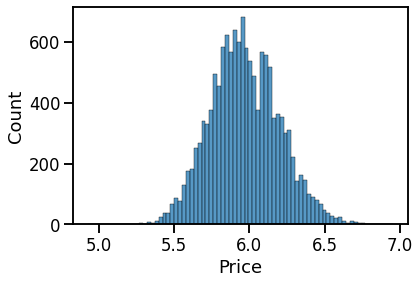

In [278]:
log_price = np.log10(df.Price)
sns.histplot(log_price)

In [279]:
shapiro_test = stats.shapiro(np.log10(df.Price.sample(4500)))
shapiro_test

(0.9968264102935791, 3.700628070646417e-08)

In [280]:
#Límite Inferior
10**(log_price.mean()-log_price.std()*3)

191955.0069553842

In [281]:
#Límite Superior
10**(log_price.mean()+log_price.std()*3)

4527748.07661868

In [282]:
df = df[(df.Price < 10**(log_price.mean()+log_price.std()*3))&(df.Price > 10**(log_price.mean()-log_price.std()*3))]
df

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,price,weekly_price,monthly_price
0,Abbotsford,85 Turner St,2,h,1480000.00,S,Biggin,3/12/2016,2.50,3067.00,2.00,1.00,1.00,202.00,nan,nan,Yarra,-37.80,145.00,Northern Metropolitan,4019.00,130.62,605.15,2187.03
1,Abbotsford,25 Bloomburg St,2,h,1035000.00,S,Biggin,4/02/2016,2.50,3067.00,2.00,1.00,0.00,156.00,79.00,1900.00,Yarra,-37.81,144.99,Northern Metropolitan,4019.00,130.62,605.15,2187.03
2,Abbotsford,5 Charles St,3,h,1465000.00,SP,Biggin,4/03/2017,2.50,3067.00,3.00,2.00,0.00,134.00,150.00,1900.00,Yarra,-37.81,144.99,Northern Metropolitan,4019.00,130.62,605.15,2187.03
3,Abbotsford,40 Federation La,3,h,850000.00,PI,Biggin,4/03/2017,2.50,3067.00,3.00,2.00,1.00,94.00,nan,nan,Yarra,-37.80,145.00,Northern Metropolitan,4019.00,130.62,605.15,2187.03
4,Abbotsford,55a Park St,4,h,1600000.00,VB,Nelson,4/06/2016,2.50,3067.00,3.00,1.00,2.00,120.00,142.00,2014.00,Yarra,-37.81,144.99,Northern Metropolitan,4019.00,130.62,605.15,2187.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,12 Strada Cr,4,h,1245000.00,S,Barry,26/08/2017,16.70,3150.00,4.00,2.00,2.00,652.00,nan,1981.00,NaN,-37.91,145.17,South-Eastern Metropolitan,7392.00,124.03,526.35,1901.61
13576,Williamstown,77 Merrett Dr,3,h,1031000.00,SP,Williams,26/08/2017,6.80,3016.00,3.00,2.00,2.00,333.00,133.00,1995.00,NaN,-37.86,144.88,Western Metropolitan,6380.00,191.09,612.25,2119.75
13577,Williamstown,83 Power St,3,h,1170000.00,S,Raine,26/08/2017,6.80,3016.00,3.00,2.00,4.00,436.00,nan,1997.00,NaN,-37.85,144.89,Western Metropolitan,6380.00,191.09,612.25,2119.75
13578,Williamstown,96 Verdon St,4,h,2500000.00,PI,Sweeney,26/08/2017,6.80,3016.00,4.00,1.00,5.00,866.00,157.00,1920.00,NaN,-37.86,144.89,Western Metropolitan,6380.00,191.09,612.25,2119.75


# Análisis de Datos Faltantes

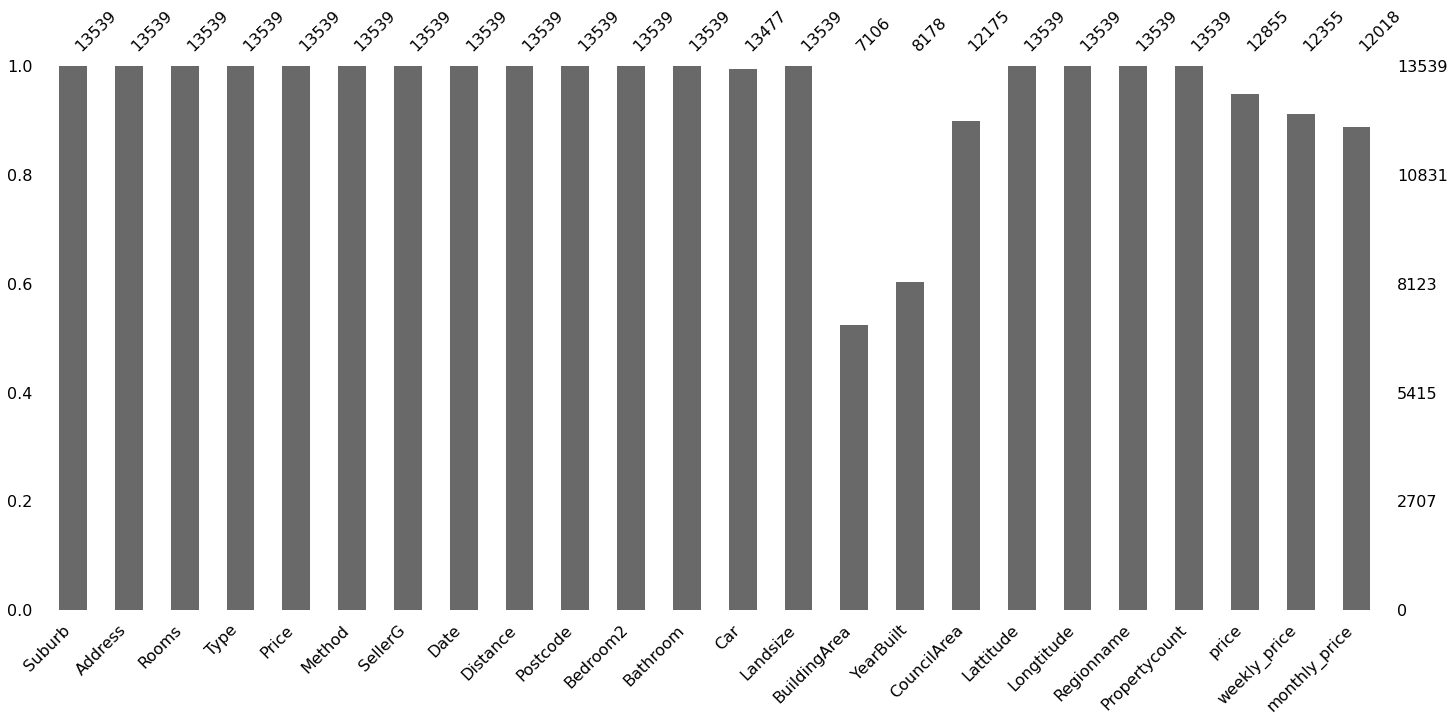

In [283]:
msn.bar(df)

In [342]:
#Proponemos imputar con la media de YearBuilt del Suburb correspondiente
suburb_year = dict(pd.Series(df.groupby('Suburb').YearBuilt.mean().round(), dtype = 'Int64'))
#Diccionario que contiene la equivalencia entre los valores de 'Suburb' y la media de 'YearBuilt'

In [364]:
df.YearBuilt.isna().sum()

5361

In [365]:
# Creamos un 1D DataFrame que contiene los datos NaN de 'YearBuilt' con sus respectivos índices
# Reemplazamos todos los valores NaN de 'YearBuilt' con sus respectivos valores 'Suburb'
suburb_names = pd.DataFrame(df[df.YearBuilt.isna()].loc[:,'Suburb'])
suburb_names

,Suburb
0,Abbotsford
3,Abbotsford
5,Abbotsford
8,Abbotsford
10,Abbotsford
...,...
13566,Vermont South
13567,Viewbank
13569,Wantirna South
13570,Wantirna South


In [368]:
# Tienen el mismo número de filas
suburb_names.shape[0]

5361

In [370]:
# Obtenemos un DataFrame que tiene en las mismas posiciones de índices los valores promedios de 'YearBuilt'
suburb_names.replace(to_replace = suburb_year, value = None)
#Este dato no está capturado en ninguna variable solo es un ejemplo para ver la ejecución

,Suburb
0,1945
3,1945
5,1945
8,1945
10,1945
...,...
13566,1982
13567,1974
13569,1993
13570,1993


In [374]:
# Filtramos los valores NaN de YearBuilt con la función loc para hacer una mutación
# Planteamos la equivalencia, unsando la el método loc para el DataFrame que mostramos en la celda anterior
df.loc[df.YearBuilt.isna(),'YearBuilt'] = suburb_names.replace(to_replace = suburb_year, value = None).loc[:,'Suburb']

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [375]:
yearbuilt = df.YearBuilt.astype('Int64')
yearbuilt

0        1945
1        1900
2        1900
3        1945
4        2014
         ... 
13575    1981
13576    1995
13577    1997
13578    1920
13579    1920
Name: YearBuilt, Length: 13539, dtype: Int64

In [377]:
#Estos NaN son de Suburb's que no tienen ningun valor de YearBuilt y por tanto no tiene un valor de media
yearbuilt.loc[yearbuilt.isna()]

7376     <NA>
7377     <NA>
7378     <NA>
8936     <NA>
10045    <NA>
10223    <NA>
10504    <NA>
10546    <NA>
10576    <NA>
10894    <NA>
10938    <NA>
11256    <NA>
11580    <NA>
12437    <NA>
12438    <NA>
12641    <NA>
13245    <NA>
13494    <NA>
Name: YearBuilt, dtype: Int64

In [361]:
#Esto fue idea de Alfre/Rodri/Lioren preguntenlé a elles, pero funca
yearbuilt.loc[yearbuilt.isna()] = suburb_names.replace(to_replace = suburb_year, value = None).loc[:,'Suburb']

In [362]:
yearbuilt

0        1945
1        1900
2        1900
3        1945
4        2014
         ... 
13575    1981
13576    1995
13577    1997
13578    1920
13579    1920
Name: YearBuilt, Length: 13539, dtype: Int64

In [249]:
df.YearBuilt.replace(suburb_year)
df.YearBuilt

0        Abbotsford
1           1900.00
2           1900.00
3        Abbotsford
4           2014.00
            ...    
13575       1981.00
13576       1995.00
13577       1997.00
13578       1920.00
13579       1920.00
Name: YearBuilt, Length: 13539, dtype: object

## Ejercicio 2: Imputación

1. Imputar los valores faltantes de la columna CouncilArea en base a la información presente en Suburb. (Si en el punto anterior no seleccionó ninguna de estas variables, agréguelas ahora el conjunto de datos).

2. Imputar los valores faltantes de la(s) columna(s) que se agregaron a partir del conjunto de datos de AirBnB.



## Ejercicio 3

Crear y guardar un nuevo conjunto de datos con todas las transformaciones realizadas anteriormente.

In [ ]:
def estudio(serie,out=0.99):
  
  variable='ninguna'
  if serie.dtype=='object':
    serie=serie.astype('category')
    variable='categoria'
  elif serie.dtype in ('float','float64','float32','float16'):
    variable='continua'
  elif serie.dtype in ('int','int32','int64','int16'):
    variable='discreta'
  print(variable)
  #CATEGORIAS
  
  if variable=='categoria':
    countplt, ax = plt.subplots(figsize = (18,7))
    categorias=serie.unique()
    n=8
    if len(categorias)<=n:
      nva=resumen.nlargest(n)
      orden=list(nva.index)
      ax=seaborn.countplot(x=serie,order=orden)
    else:
      dict={}
      resumen=serie.value_counts()
      nva=resumen.nlargest(n-1)
      orden=list(nva.index)

      for i in resumen.index:
        if resumen.loc[i]<nva.iloc[-1]:
          dict[i]='Otro'
        else:
          dict[i]=i
      orden=orden+['Otro']
      serie2=serie.replace(dict)
      ax=seaborn.countplot(x=serie2,order=orden)
    for rect in ax.patches:
      ax.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 0.75,rect.get_height(),horizontalalignment='center', fontsize = 11)
    plt.xticks(rotation=30);
  elif variable=='continua':
    fig, ax = plt.subplots(2,1,figsize = (18,7))
    seaborn.histplot(serie,bins=50,ax=ax[0])
    seaborn.boxplot(serie,ax=ax[1])
    print(serie.describe())
  elif variable=='discreta':
    categorias=serie.unique()
    n=50
    if len(categorias)>n:
      fig, ax = plt.subplots(2,1,figsize = (18,7))
      seaborn.histplot(serie,bins=50,ax=ax[0])
      seaborn.boxplot(serie,ax=ax[1])
      print(serie.describe())
    else:
      countplt, ax = plt.subplots(figsize = (18,7))
    categorias=serie.unique()
    n=8
    if len(categorias)<=n:
      nva=resumen.nlargest(n)
      orden=list(nva.index)
      ax=seaborn.countplot(x=serie,order=orden)
    else:
      dict={}
      resumen=serie.value_counts()
      nva=resumen.nlargest(n-1)
      for i in resumen.index:
        if resumen.loc[i]<nva.iloc[-1]:
          dict[i]='Otro'
        else:
          dict[i]=i
      serie2=serie.replace(dict)
      ax=seaborn.countplot(x=serie2)
    for rect in ax.patches:
      ax.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 0.75,rect.get_height(),horizontalalignment='center', fontsize = 11)
    plt.xticks(rotation=30);




discreta


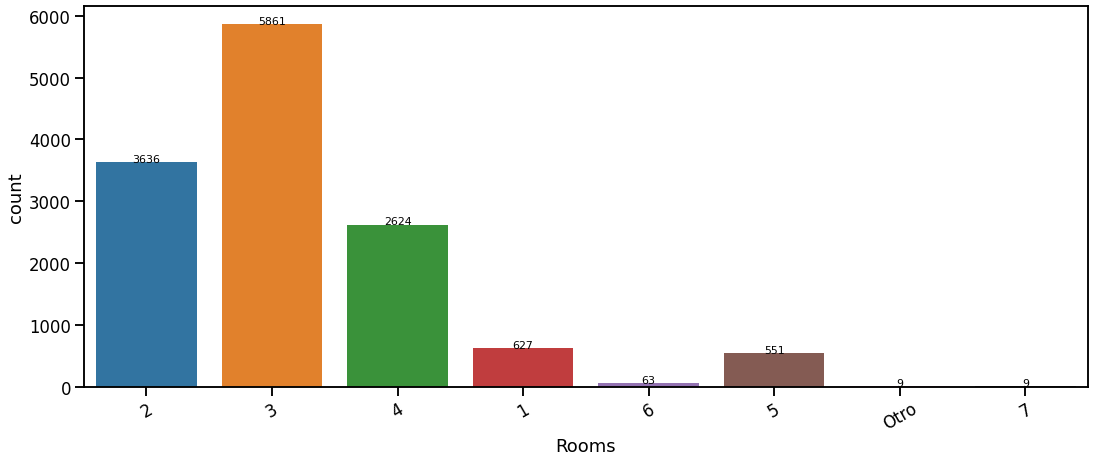

In [ ]:
estudio(df['Rooms'])

# **Respuestas**

## **Ejercicio 1**

### **1.Eliminar los valores extremos que no sean relevantes para la predicción de valores de las propiedades.**

Se procede a estudiar los outliers tanto superiores como inferiores

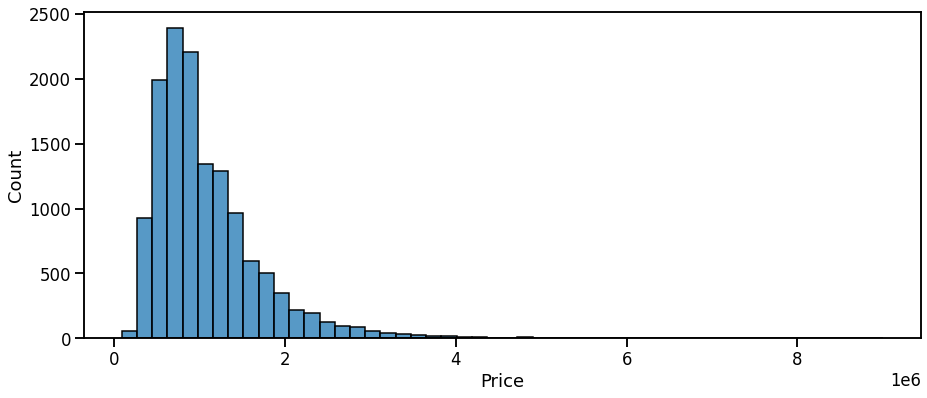

In [ ]:
f,ax=plt.subplots(figsize=(15,6))
seaborn.histplot(melb_df['Price'],bins=50)

In [ ]:
precio1=melb_df['Price']
precio1.describe()

count     13580.00
mean    1075684.08
std      639310.72
min       85000.00
25%      650000.00
50%      903000.00
75%     1330000.00
max     9000000.00
Name: Price, dtype: float64

Se ve que el valor máximo llega a **9.000.000 USD** cuando el tercer cuartil es **1.330.000 USD**.

Analizando el histograma y los parametros descriptivos se ve la existencia de outliers, sobre todo para el lado del máximo. 


Limite superior propuesto: 3338150.0 
Cantidad de valores totales: 13580 
Valores que quedarian fuera: 136



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



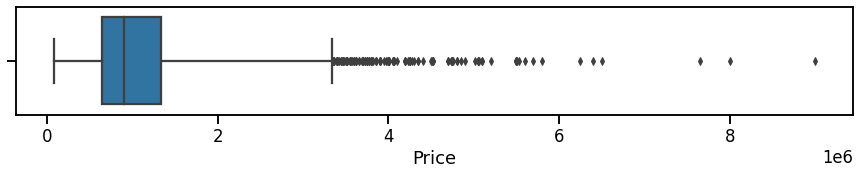

In [ ]:
limite_sup=precio1.quantile(0.99)
print(f'Limite superior propuesto: {limite_sup.round(2)} \nCantidad de valores totales: {len(precio1)} \nValores que quedarian fuera: {(precio1>limite_sup).sum()}\n')


rangointer=precio1.quantile(0.75)-precio1.quantile(0.25)
w=(limite_sup-precio1.quantile(0.75))/rangointer

f,ax=plt.subplots(figsize=(15,2))
seaborn.boxplot(melb_df['Price'],whis=w)


Se podria tomar como limite superior para dejar fuera los outliers superiores, el percentil del **99%**, dejando afuera solo **136 valores**.

Por lo tanto se toma como limite superior el valor de **3.338.150 USD**

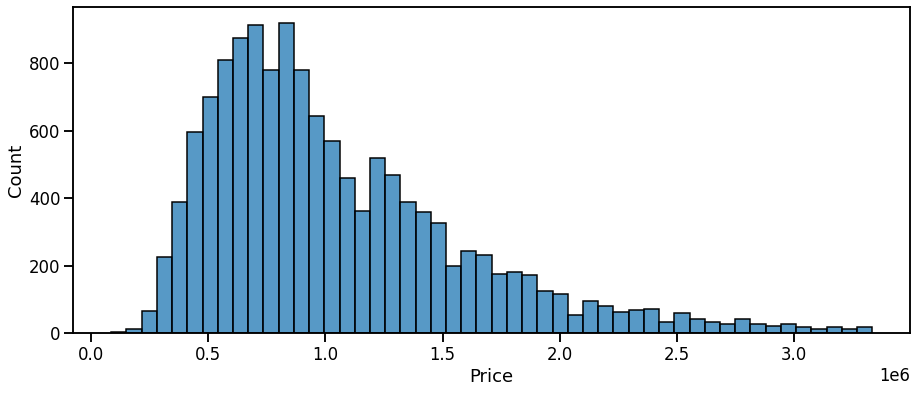

In [ ]:
f,ax=plt.subplots(figsize=(15,6))
precio2=melb_df[(melb_df['Price']<limite_sup)]['Price']
seaborn.histplot(precio2,bins=50)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



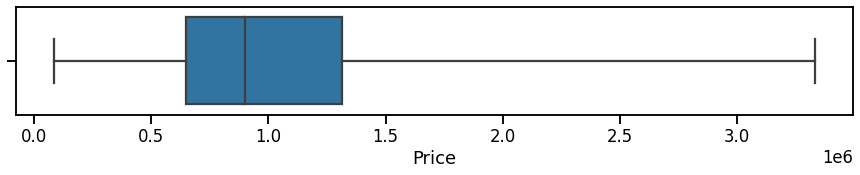

In [ ]:
f,ax=plt.subplots(figsize=(15,2))
seaborn.boxplot(precio2,whis=3.9)

In [ ]:

limite_inf=precio1.quantile(0.005)
print(f'Limite inferior propuesto: {limite_inf.round(2)} \nCantidad de valores totales: {len(precio1)} \nValores que quedarian fuera: {(precio1<limite_inf).sum()}\n')


Limite inferior propuesto: 270000.0 
Cantidad de valores totales: 13580 
Valores que quedarian fuera: 64



Se podria tomar como limite inferior para dejar fuera los outliers inferiores, el percentil del **0,5%**, dejando afuera solo **64 valores**.
se propone un limite inferior de 0,5% y no de 1% como el superior por que estan más cercanos a la media y por lo tanto tienen menos influencia que los superiores. 

Por lo tanto se toma como limite inferior el valor de **270.000,0 USD** y se procede a relaizar el histograma final y una descricion de la variable **'Price'**

discreta


count     13380.00
mean    1048113.11
std      551015.71
min      270000.00
25%      650000.00
50%      900000.00
75%     1320000.00
max     3335000.00
Name: Price, dtype: float64

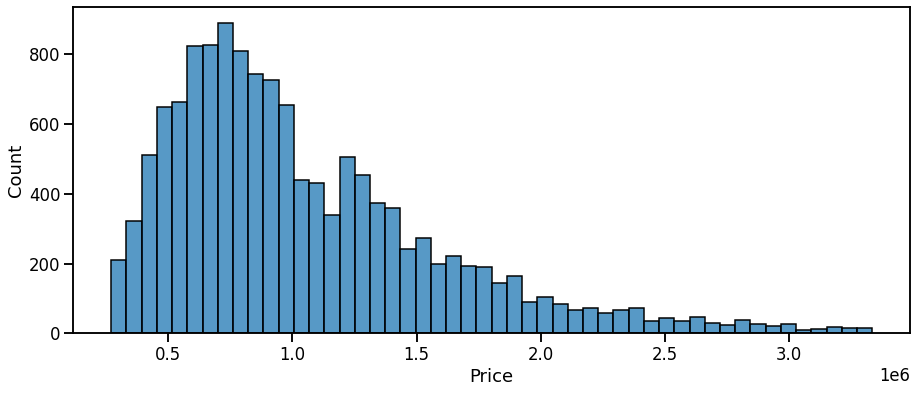

In [ ]:
df=melb_df[(melb_df['Price']>=limite_inf) & (melb_df['Price']<=limite_sup)]
precio=df['Price']
estudio(df['Rooms'])
f,ax=plt.subplots(figsize=(15,6))
seaborn.histplot(precio,bins=50)
precio.describe()

### **2.Investigar la distribución de las variables del conjunto de datos y seleccionar un subconjunto de columnas que les parezcan relevantes al problema de predicción del valor de la propiedad.**
  1. Justificar cada columna no seleccionada.
  2. Para las variables categóricas seleccionadas, agrupe o combine las categorías poco frecuentes para asegurar que todos los grupos tengan un número mínimo de registros.

In [ ]:
df.isna().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6372
YearBuilt        5310
CouncilArea      1355
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

In [ ]:
variables=list(df.columns)
for variable in variables:
  print(variable,len(df[variable].unique()))

Suburb 314
Address 13182
Rooms 9
Type 3
Price 2087
Method 5
SellerG 268
Date 58
Distance 202
Postcode 198
Bedroom2 12
Bathroom 9
Car 12
Landsize 1421
BuildingArea 587
YearBuilt 144
CouncilArea 34
Lattitude 6464
Longtitude 7018
Regionname 8
Propertycount 311


Como primer medidida se dejaria afuera **CouncilArea**, porque segun nuestro criterio tiene muchos faltantes y puede ser reeemplazada por mejores variables que den una ubicacion aproximada de la propiedad (como puede ser Suburb o PostCode), **Address** tampoco se tendria en cuenta porque es un valor categorico que es casi unico para cada propiedad y sería mejor utilizar otras variables para definir una ubicacion.

La variable **SellerG** es una variable categorica de muchos valores posibles y el vendedor no deberia ser un factor importante en el precio de la propiedad 

**YearBuilt** y **BuildingArea** tienen muchos valores faltantes lo que podria ser un motivo para no tenerlas en cuenta, pero es cierto que parecieran ser parametros que influirian en el precio de la propiedad, por lo que por el momento se dejarian en estudio

In [ ]:
variables=list(svariables)
excluir={'CouncilArea','Address','SellerG'}
svariables=set(variables)
svariables=svariables-excluir



NameError: ignored

In [ ]:
scategoricas={'Regionname','Type','Suburb','Method','Regionname'}
sdiscretas={'Rooms','Car','Bedroom2','Bathroom','Postcode'}
stiempo={'Date'}
snumericas=svariables-scategoricas-sdiscretas-stiempo

numericas=list(snumericas)

f,axs=plt.subplots(len(numericas),1,figsize=(15,6*len(numericas)))
for variable in numericas:
    seaborn.histplot(df[variable],bins=50,ax=axs[numericas.index(variable)])


In [ ]:
f,axs=plt.subplots(len(numericas),1,figsize=(15,6*len(numericas)))
for variable in numericas:
    seaborn.boxplot(df[variable],ax=axs[numericas.index(variable)])

Se ven outliers en algunas variables (BuildingArea, Landsize, YearBuilt), por lo que seria conveniente trabajar sobre estos valores, tal vez borrarlos o trabajarlos para corregirlos


In [ ]:
print(df[(df['YearBuilt']<1800)]['YearBuilt'])
print(df[(df['BuildingArea']>2000)]['BuildingArea'])
print(df[(df['Landsize']>50000)]['Landsize'])

In [ ]:
df_filtrado=df[((df['YearBuilt']!=1196)&((df['BuildingArea']<= 2000)|(df['BuildingArea'].isnull())) &((df['Landsize']<=50000)|(df['Landsize'].isnull())))]

print(len(df),len(df_filtrado))

In [ ]:

f,axs=plt.subplots(len(numericas),1,figsize=(15,6*len(numericas)))

for variable in numericas:
  seaborn.scatterplot(data=df_filtrado, x=variable, y=df_filtrado['Price'],ax=axs[numericas.index(variable)])


In [ ]:
categoricas=list(scategoricas)

f,axs=plt.subplots(len(categoricas),1,figsize=(18,6*len(categoricas)))
for variable in categoricas:
    seaborn.barplot(data=df,x=variable,y='Price',ax=axs[categoricas.index(variable)])

NameError: ignored

### 3.Agregar información adicional respectiva al entorno de una propiedad a partir del [conjunto de datos de AirBnB](https://www.kaggle.com/tylerx/melbourne-airbnb-open-data?select=cleansed_listings_dec18.csv) utilizado en el práctico. 
  1. Seleccionar qué variables agregar y qué combinaciones aplicar a cada una. Por ejemplo, pueden utilizar solo la columna `price`, o aplicar múltiples transformaciones como la mediana o el mínimo.


In [ ]:
airbnb_df.info()

In [ ]:
relevant_cols = ['price', 'weekly_price', 'monthly_price']
airbnb_df.isna().sum()

la columna precio no tiene valores perdidos, comparada con weekly price o monthly price, entiendo que s epodria usar la mediana

  2. Utilizar la variable zipcode para unir los conjuntos de datos. Sólo incluir los zipcodes que tengan una cantidad mínima de registros (a elección) como para que la información agregada sea relevante.
  

3. Investigar al menos otras 2 variables que puedan servir para combinar los datos, y justificar si serían adecuadas o no. Pueden asumir que cuentan con la ayuda de anotadores expertos para encontrar equivalencias entre barrios o direcciones, o que cuentan con algoritmos para encontrar las n ubicaciones más cercanas a una propiedad a partir de sus coordenadas geográficas. **NO** es necesario que realicen la implementación.

Pueden leer otras columnas del conjunto de AirBnB además de las que están en `interesting_cols`, si les parecen relevantes.


La columna Suburb es una buena variable para combinar

In [ ]:
airb=set(airbnb_df.suburb.unique())
melb=set(melb_df.Suburb.unique())

intersections = airb.intersection(melb)
print("Airbnb unique Suburb", len(airbnb_df.suburb.unique()))
print("Sales unique Suburb", len(melb_df.Suburb.unique()))
print("Common Suburb", len(intersections))

In [ ]:
airbnb_df['zipcode'] = pandas.to_numeric(airbnb_df.zipcode, errors='coerce')

In [ ]:
intersection = numpy.intersect1d(
    airbnb_df.zipcode.values, melb_df.Postcode.values, assume_unique=False)
print("Airbnb unique zipcodes", len(airbnb_df.zipcode.unique()))
print("Sales unique zipcodes", len(melb_df.Postcode.unique()))
print("Common zipcodes", len(intersection))

In [ ]:
print('Records in Sales df with corresponding suburb form Airbnb df',
      melb_df.Suburb.isin(intersections).sum() / len(melb_df))
print('Records in Airbnb df with corresponding suburb form Sales df',
      airbnb_df.suburb.isin(intersections).sum() / len(airbnb_df))

In [ ]:
#Intento de salvar valores fuera de la intercepcion de codigo postal
melb_dfnzc=melb_df[(~melb_df.Postcode.isin(intersection))]
melbnzc=set(melb_dfnzc.Suburb.unique())

intersectionsnzc = airb.intersection(melbnzc)
print("Airbnb unique Suburb", len(airbnb_df.suburb.unique()))
print("Sales unique Suburb", len(melb_dfnzc.Suburb.unique()))
print("Common Suburb", len(intersectionsnzc))


In [ ]:
#Intento de salvar valores fuera de la intercepcion de suburbios
melb_dfnsb=melb_df[(~melb_df.Suburb.isin(intersections))]
melbnsb=set(melb_dfnsb.Postcode.unique())

intersectionsnsb = airb.intersection(melbnsb)
print("Airbnb unique Zipcode", len(airbnb_df.zipcode.unique()))
print("Sales unique Postcode", len(melb_dfnsb.Postcode.unique()))
print("Common zipcode", len(intersectionsnsb))

In [ ]:
airbnb_df[(airbnb_df.suburb.isin(intersections))].isna().sum()

In [ ]:
airbnb_df[(airbnb_df.zipcode.isin(intersection))].isna().sum()

## Ejercicio 2: Imputación



### 1.Imputar los valores faltantes de la columna CouncilArea en base a la información presente en Suburb. (Si en el punto anterior no seleccionó ninguna de estas variables, agréguelas ahora el conjunto de datos).




### 2.Imputar los valores faltantes de la(s) columna(s) que se agregaron a partir del conjunto de datos de AirBnB.